In [23]:
import json
import pandas as pd

import matplotlib.pyplot as plt

In [6]:
with open('exp_setup.json') as json_file:
    exp_setup = json.load(json_file)
    
df = pd.read_csv('metatest_results.csv')

,exp_nr,metatest,K,avg,std
0,1,cb,2,0.443000,0.171835
1,1,rte,2,0.500366,0.028607
2,1,rte,4,0.500000,0.028605
3,1,sick,2,0.353067,0.163422
4,1b,cb,2,0.346000,0.089701
...,...,...,...,...,...
62,5b,sick,8,0.677495,0.038141
63,6b,cb,2,0.361000,0.107698
64,6b,rte,2,0.541209,0.082584
65,6b,rte,4,0.576766,0.080677


In [ ]:
def plot_few_shot(acc_dict, name, color=None, ax=None):
    sns.set()
    if ax is None:
        fig, ax = plt.subplots(1,1,figsize=(5,3))
    ks = sorted(list(acc_dict.keys()))
    mean_accs = [acc_dict[k][0] for k in ks]
    std_accs = [acc_dict[k][1] for k in ks]
    ax.plot(ks, mean_accs, marker='o', markeredgecolor='k', markersize=6, label=name, color=color)
    ax.fill_between(ks, [m-s for m,s in zip(mean_accs, std_accs)], [m+s for m,s in zip(mean_accs, std_accs)], alpha=0.2, color=color)
    ax.set_xticks(ks)
    ax.set_xlim([ks[0]-1, ks[-1]+1])
    ax.set_xlabel("Number of shots per class", weight='bold')
    ax.set_ylabel("Accuracy", weight='bold')
    if len(ax.get_title()) == 0:
        ax.set_title("Few-Shot Performance " + name, weight='bold')
    else:
        ax.set_title(ax.get_title() + " and " + name, weight='bold')
    ax.legend()
    return ax

Adapters used: ['boolq', 'cb', 'csqa', 'imdb', 'mrpc']
Meta-trained on: ['mnli', 'qqp', 'sst', 'wgrande']


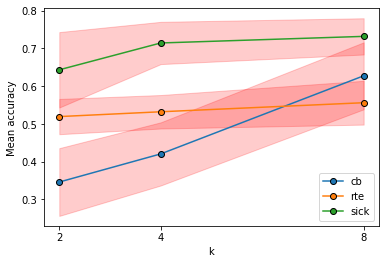

Adapters used: ['cqa', 'csqa', 'hswag', 'siqa', 'wgrande']
Meta-trained on: ['argument', 'imdb', 'mnli', 'mrpc', 'scitail']


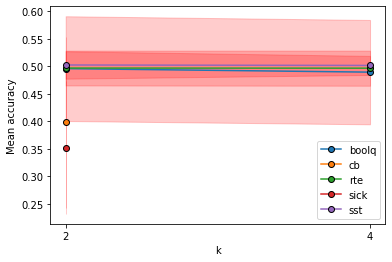

Adapters used: ['cb', 'mnli', 'rte', 'scitail', 'sick']
Meta-trained on: ['argument', 'imdb', 'mrpc', 'qqp']


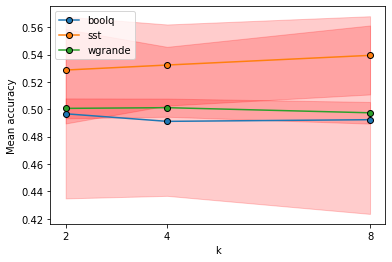

Adapters used: ['cb', 'mnli', 'rte', 'scitail', 'sick']
Meta-trained on: ['argument', 'imdb', 'mrpc', 'qqp']


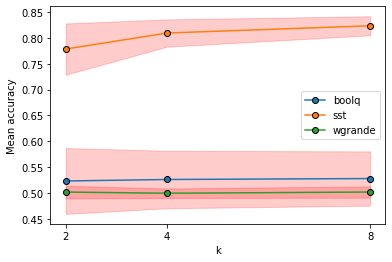

Adapters used: ['boolq', 'mnli', 'qqp', 'sst', 'wgrande']
Meta-trained on: ['argument', 'imdb', 'mrpc', 'scitail']


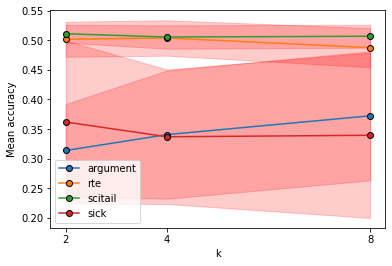

Adapters used: ['boolq', 'mnli', 'qqp', 'sst', 'wgrande']
Meta-trained on: ['argument', 'imdb', 'mrpc', 'scitail']


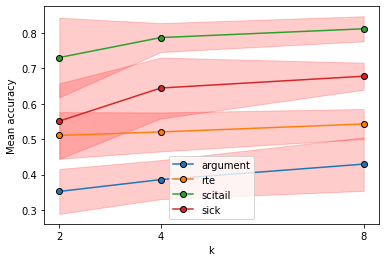

Adapters used: ['argument', 'boolq', 'cb', 'cqa', 'csqa', 'hswag', 'imdb', 'mnli', 'mrpc', 'qqp', 'rte', 'scitail', 'sick', 'siqa', 'sst', 'wgrande']
Meta-trained on: ['argument', 'imdb', 'mrpc', 'scitail']


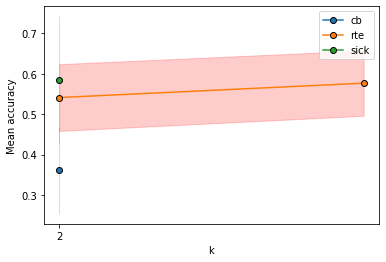

In [42]:
exp_nrs = df['exp_nr'].unique()

for nr in exp_nrs:
    if nr == '1':
        continue
    if len(nr) > 1:
        nr_setup = nr[0]
    else:
        nr_setup = nr
    
        
    setup = exp_setup[nr_setup]
    
    exp_results = df.loc[df['exp_nr'] ==  nr]
    tasks = exp_results['metatest'].unique()
    
    for task in tasks:
        task_df = exp_results.loc[exp_results['metatest'] ==  task]
        
        
        accs = task_df['avg'].values
        stds = task_df['std'].values
        ks = task_df['K'].values
        
        plt.plot(ks, accs,  marker='o', markeredgecolor='k', markersize=6)
        plt.fill_between(ks, [m-s for m,s in zip(accs, stds)], [m+s for m,s in zip(accs, stds)], alpha=0.2, color='red')
        
    plt.xticks(ks)   
    plt.xlabel('k')
    plt.legend(tasks)
    plt.ylabel('Mean accuracy')
    print("Adapters used:", setup['adapters'])
    print("Meta-trained on:", setup['metatrain'])
    plt.show()
    


